CA1 - Data Preparation
Guilherme da Silva Leal



###### Scenario: 
###### You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates  pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The  dataset’s positive class consists of component failures for a specific component of the APS system.  The negative class consists of trucks with failures for components not related to the APS. The data  consists of a subset of all available data, selected by experts. This analysis will help determine the  investment strategy for the company in the upcoming year.  All data wrangling, analysis, and visualizations must generated using python. 
 
###### The companies CTO also requires you to rationalize all the decisions that you have made in your report. 

###### Requirements:
###### You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following  analysis and report on your findings: 
###### - Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. 
###### - Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations  (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it. 
###### - Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it. 
###### - Explain in your own words what the “Curse of Dimensionality ” is. 


To start this CA properly, I would like to talk about some relevant topics. 
First I am going to talk about our main tool.
###### "Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. Python's simple, easy to learn syntax emphasizes readability and therefore reduces the cost of program maintenance. Python supports modules and packages, which encourages program modularity and code reuse. The Python interpreter and the extensive standard library are available in source or binary form without charge for all major platforms, and can be freely distributed."  (About Python | Python Institute, 2021)
Using Python allow us to go straight to the point, because it is a very simple and intuitive language of programming. We can also save time and computing resources.
It can be applied to many areas as web and internet development, scientific and numeric computing, education, software development, business applications, medical applications, among others.
There is an important set of tools which makes the user's life easier: The Libraries. But what exactly is this?

###### "A library is a collection of pre-combined codes that can be used iteratively to reduce the time required to code. They are particularly useful for accessing the pre-written frequently used codes, instead of writing them from scratch every single time. Similar to the physical libraries, these are a collection of reusable resources, which means every library has a root source. This is the foundation behind the numerous open-source libraries available in Python."  (Advani, 2021)

Usually, importing the libraries is the first step that has to be done because every line of code is going to be part of a function inside the library.

Now that is known, let us start our project.

In this case we have to import some libraries which are used very often in Data Analytics. They are:
- Pandas;
- Seaborn;
- Matplolib;
- Numpy;


In [8]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Now I am going to read the dataset, which one is going to be our work object.

In [9]:
aps_failure_set_df = pd.read_csv("aps_failure_set.csv")

Now I am going to use the function .info(), to know some relevant information about the dataset.

In [10]:
aps_failure_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


Now I am going to use the function .head() to view the first 5 dataset's rows.

In [11]:
aps_failure_set_df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


Now I am going to use the function .tail() to view the last 5 dataset's rows.

In [12]:
aps_failure_set_df.tail(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


Now I am going to use the function .shape, to check how many rows and collumns there are in the dataset.

In [13]:
aps_failure_set_df.shape

(60000, 171)

Now I am going to use the function .dtypes to check the type of type of the variables.

In [14]:
aps_failure_set_df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

As we can see above, most of our collumns have "object" as variable type. Because of that I am going to tranform them into "floats".

Now I am going to use the function .describe() to check the main statistics values.

In [15]:
aps_failure_set_df.describe(include="all")

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I am going to create a new data frame to check if there is any duplicated row in the dataset.

In [16]:
dup_aps_failure_set_df = aps_failure_set_df[aps_failure_set_df.duplicated()]

Now I am going to check how many rows do I have duplicated.

In [17]:
print("Number of duplicated rows: ",dup_aps_failure_set_df.shape)

Number of duplicated rows:  (0, 171)


Now I am going to check if the dataset has any missing value. The output of this line of code is going to show how many missing values the dataset has in each collumn.

In [18]:
missing_values = ["n.a.", "?", "n/a", "na", "--", "NaN"]
aps_failure_set_df = pd.read_csv("aps_failure_set.csv",na_values = missing_values)

In [19]:
print(aps_failure_set_df.isnull(). sum())

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In addition, I am going to count how many missing values there are in the whole dataset.

In [20]:
print("Number of missing values in the whole dataset: ",aps_failure_set_df.isnull().sum().sum())

Number of missing values in the whole dataset:  850015


After doing this, I have transformed the variables type "object" into variables type "float", to make it easy to work with later.

In [21]:
aps_failure_set_df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [22]:
aps_failure_set_df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


Now I am going to start to clean the dataset using the function "dropna", to remove the collumns with more than 70% of missing values.

In [23]:
aps_failure_set_df = aps_failure_set_df.dropna(axis=1, thresh=18000)

I am going to use the function "shape" to check how many collumns I have now.

In [24]:
print("Number of rows x collumns: ",aps_failure_set_df.shape)

Number of rows x collumns:  (60000, 164)


Now I am going to replace the missing values by the mean of the collumn, aiming to keep the reliability of the dataset. 

In [25]:
aps_failure_set = aps_failure_set_df.fillna(aps_failure_set_df.mean())

Now I am going to find how many negative and positive entries there are in the dataset and then, plot the graphic.

In [26]:
aps_failure_set_df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='Count'>

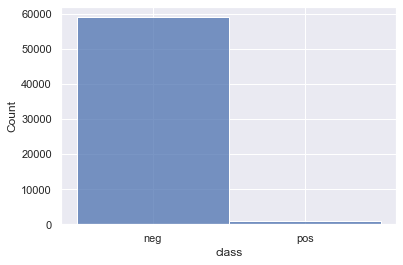

In [27]:
sns.histplot(aps_failure_set_df["class"])

Now, I am going to transform the collumn "class" in numerical values, aiming make it workable in our dataset.

In [28]:
aps_failure_set_df = aps_failure_set_df.replace(to_replace="neg",value="1")
aps_failure_set_df = aps_failure_set_df.replace(to_replace="pos",value="2")

Now I am going to plot the graphic to have a better idea of the distribution of "negative" and "positive", replaced by "1" and "2."

<AxesSubplot:xlabel='class', ylabel='Count'>

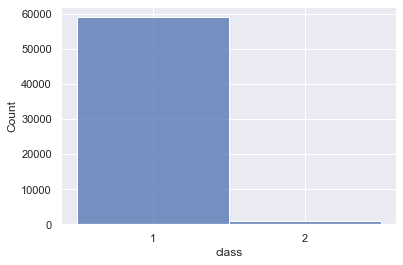

In [29]:
sns.histplot(aps_failure_set_df["class"])

Now I am going to rename the dataset "aps_failure_set" to "new_aps", to make it easier.

In [30]:
new_aps_df = aps_failure_set

In [31]:
new_aps_df.head(5)

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [32]:
print(new_aps_df.isnull(). sum())

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 164, dtype: int64


###### STARTING PCA

###### "Large datasets are increasingly common and are often difficult to interpret. Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. Finding such new variables, the principal components, reduces to solving an eigenvalue/eigenvector problem, and the new variables are defined by the dataset at hand, not a priori, hence making PCA an adaptive data analysis technique. It is adaptive in another sense too, since variants of the technique have been developed that are tailored to various different data types and structures."  (T. Jolliffe and Cadima, 2021).

I am going to call sklearn and then import the function "PCA", to start the process of reduce the dimensionality.

In [69]:
from sklearn.decomposition import PCA

I am going to separate the variables as x and y, where x is the column "class" (what we want to analize) and y is all the columns apart, which has the values unleabled.

In [70]:
X = new_aps_df.drop(columns="class")
y = new_aps_df["class"]

With X and y defined, I am going to apply the function "PCA".

In [71]:
pca = PCA(0.995).fit(X)
pca.n_components_

3

The function have returned "3", what means the dataset can be exlpained by 3 principal components, with 99.5% of variance.
I am going to print the values of the explained variance ratio, the percentage weight of each principal component.

In [72]:
print(pca.explained_variance_ratio_)

[0.97423428 0.01489505 0.0060155 ]


As we can see above, the first principal component can explain 97.42% of the data, the second, 1.49%, while the third one, just 0.61%. We can conclude that the most important component is the first one.
I am going to plot some graphics to show how important is this component in a visual way.

Text(0, 0.5, 'Explained Varience')

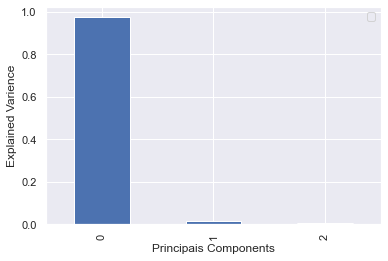

In [73]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend("")
plt.xlabel("Principais Components")
plt.ylabel("Explained Varience")

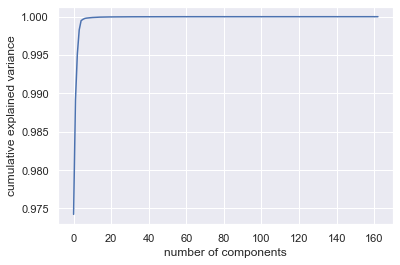

In [76]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

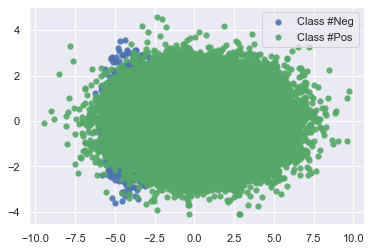

In [77]:
from sklearn.datasets import make_classification
X_new_aps, Y_new_aps = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=30, n_clusters_per_class=1, n_samples=60000, random_state=10)
pca = PCA(n_components=3)
x_vis = pca.fit_transform(X_new_aps)

palette = sns.color_palette()
plt.scatter(x_vis[Y_new_aps==0, 0], x_vis[Y_new_aps==0, 1], label="Class #Neg", alpha=0.9, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[Y_new_aps==1, 0], x_vis[Y_new_aps==1, 1], label="Class #Pos", alpha=0.9, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

###### Explain in your own words what the “Curse of Dimensionality ” is. 


The Curse of Dimensionality is a problem that the data analyst finds when dealing with a dataset with a high number of features. It happens because these features represents the space dimensions. In our case, we hae got a dataset with 170 features, which means 170 dimensions. When we try to determine patterns for this dataset, we struggling with this high amount of features, because it causes too much noise, making the analysis confuse and unprecise. 
In order to solve it, I did the preparation of data, cleaning the missing values, filling the gaps with the mean of each feature (making the dataset reliability higher) and then, applying the PCA (Principal Component Analysis), in order to reduce the number of features, making the analysis easier. I have found the 3 principal components, what means that I have reduced a large dataset (170 features) to just 3 components which explain 99.5% of variance of data. 
Looking at theses results I can say to the company that it has to take a carefull look at this variable, to make a plan of investiment to improve the system APS.

References:

Advani, V., 2021. 34 Open-Source Python Libraries You Should Know About. [online] GreatLearning Blog: Free Resources what Matters to shape your Career!. Available at: <https://www.mygreatlearning.com/blog/open-source-python-libraries/> [Accessed 9 November 2021].

Choudhury, A., 2021. Curse Of Dimensionality And What Beginners Should Do To Overcome It. [online] Analytics India Magazine. Available at: <https://analyticsindiamag.com/curse-of-dimensionality-and-what-beginners-should-do-to-overcome-it/> [Accessed 13 November 2021].

Pythoninstitute.org. 2021. About Python | Python Institute. [online] Available at: <https://pythoninstitute.org/what-is-python/> [Accessed 9 November 2021].

T. Jolliffe, I. and Cadima, J., 2021. Principal component analysis: a review and recent developments | Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences. [online] Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences. Available at: <https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202> [Accessed 11 November 2021].




